In [38]:
df = pd.read_csv('a.csv')
df.head()


,Date,Name,Open,High,Low,Close,Volume,Pct change
0,1995-01-02,HINDPETRO,54.81,54.81,54.07,54.07,2700,0.00
1,1995-01-03,HINDPETRO,55.52,55.52,53.85,53.85,35775,-0.41
2,1995-01-04,HINDPETRO,54.81,54.81,54.37,54.37,1350,0.97
3,1995-01-06,HINDPETRO,54.07,54.07,53.11,53.11,34425,-2.32
4,1995-01-09,HINDPETRO,51.85,51.85,51.11,51.70,3375,-2.65


In [39]:
df.shape


(6697, 8)

In [40]:
df.describe()


,Open,High,Low,Close,Volume,Pct change
count,6697.000000,6697.000000,6697.000000,6697.000000,6.697000e+03,6697.000000
mean,113.945335,115.903327,111.839595,113.757714,4.708826e+06,0.064966
std,98.188528,99.654607,96.454991,98.021389,5.603166e+06,2.769471
min,19.570000,22.070000,19.570000,20.840000,0.000000e+00,-32.000000
25%,53.040000,53.920000,52.070000,52.910000,1.387787e+06,-1.350000
50%,69.780000,70.890000,68.490000,69.660000,3.495026e+06,0.000000
75%,140.000000,142.400000,137.820000,139.700000,6.230590e+06,1.390000
max,491.400000,492.800000,478.750000,488.350000,8.875867e+07,47.390000


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6697 entries, 0 to 6696
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6697 non-null   object 
 1   Name        6697 non-null   object 
 2   Open        6697 non-null   float64
 3   High        6697 non-null   float64
 4   Low         6697 non-null   float64
 5   Close       6697 non-null   float64
 6   Volume      6697 non-null   int64  
 7   Pct change  6697 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 418.7+ KB


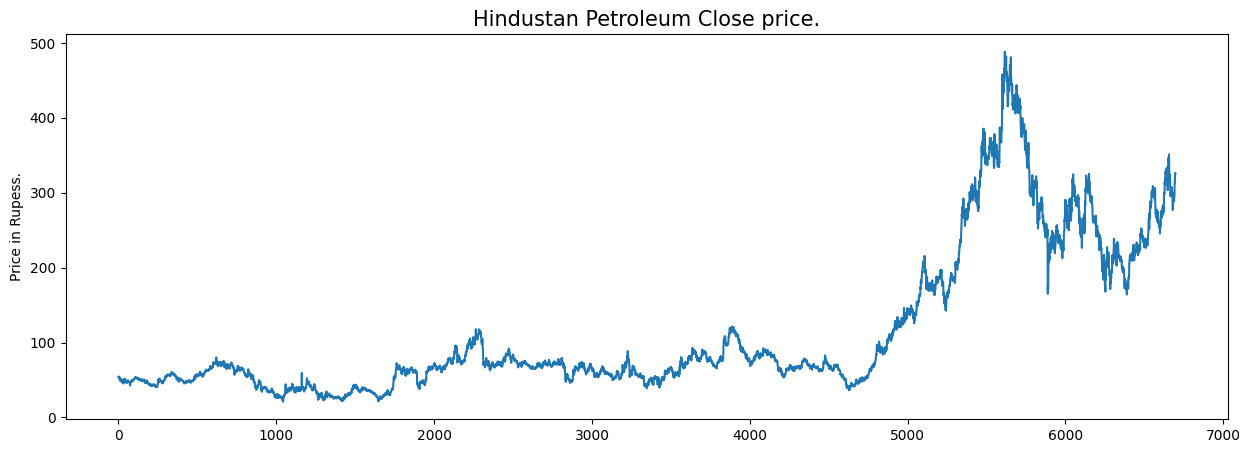

In [42]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Hindustan Petroleum Close price.', fontsize=15)
plt.ylabel('Price in Rupess.')
plt.show()


In [43]:
df.head()


,Date,Name,Open,High,Low,Close,Volume,Pct change
0,1995-01-02,HINDPETRO,54.81,54.81,54.07,54.07,2700,0.00
1,1995-01-03,HINDPETRO,55.52,55.52,53.85,53.85,35775,-0.41
2,1995-01-04,HINDPETRO,54.81,54.81,54.37,54.37,1350,0.97
3,1995-01-06,HINDPETRO,54.07,54.07,53.11,53.11,34425,-2.32
4,1995-01-09,HINDPETRO,51.85,51.85,51.11,51.70,3375,-2.65


In [44]:
df.isnull().sum()


Date          0
Name          0
Open          0
High          0
Low           0
Close         0
Volume        0
Pct change    0
dtype: int64

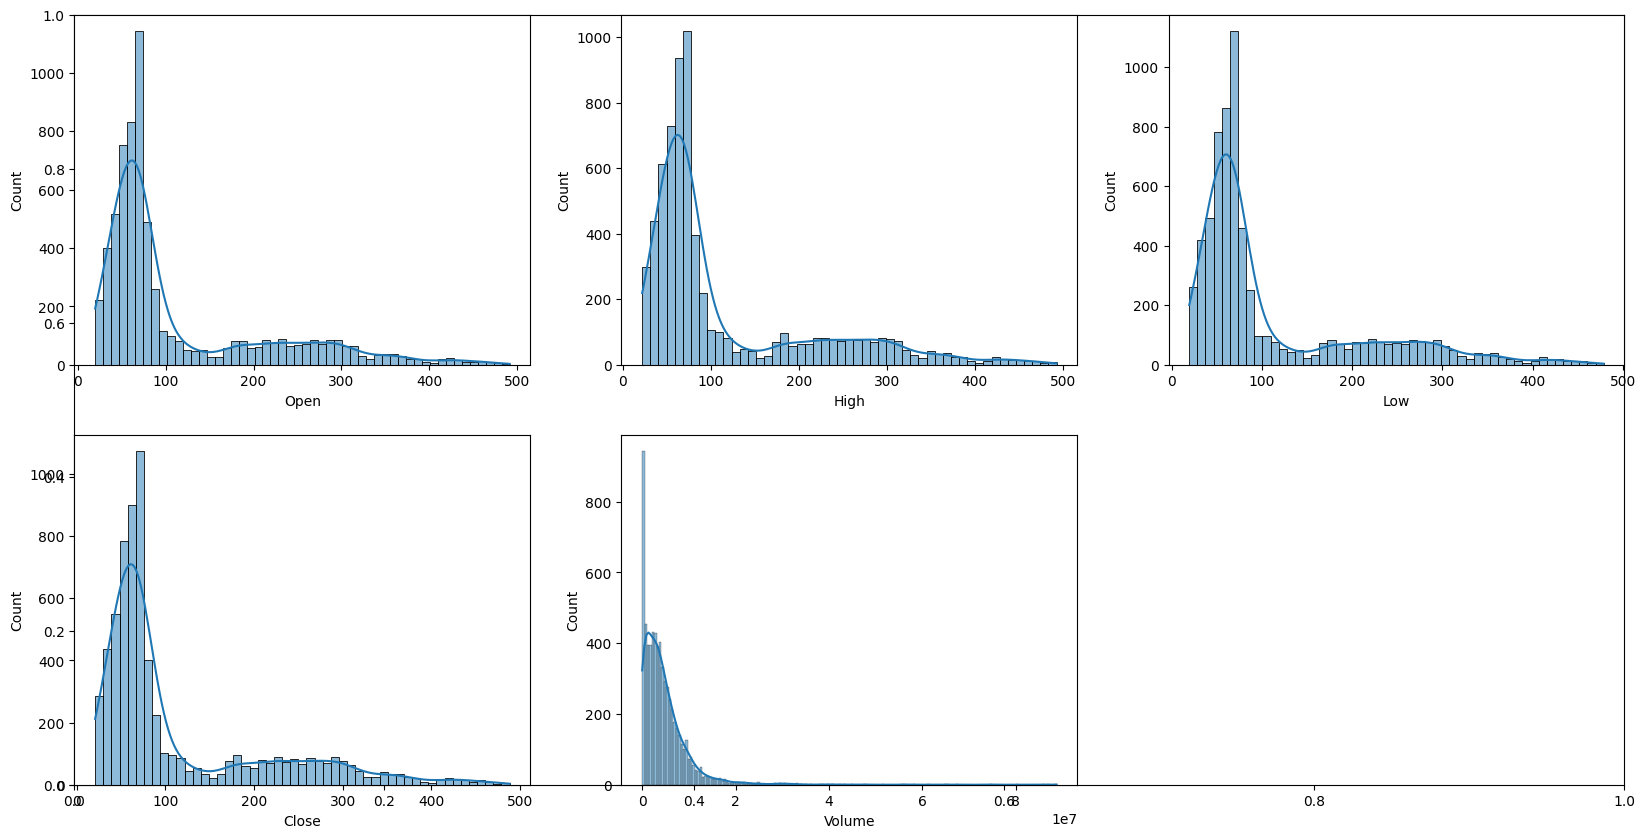

In [45]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(df[col],kde=True)
plt.show()


In [46]:
df['Date']=pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.day_name()
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year


In [47]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Name,Open,High,Low,Close,Volume,Pct change,day,month,year,is_quarter_end
0,1995-01-02,HINDPETRO,54.81,54.81,54.07,54.07,2700,0.00,Monday,1,1995,0
1,1995-01-03,HINDPETRO,55.52,55.52,53.85,53.85,35775,-0.41,Tuesday,1,1995,0
2,1995-01-04,HINDPETRO,54.81,54.81,54.37,54.37,1350,0.97,Wednesday,1,1995,0
3,1995-01-06,HINDPETRO,54.07,54.07,53.11,53.11,34425,-2.32,Friday,1,1995,0
4,1995-01-09,HINDPETRO,51.85,51.85,51.11,51.70,3375,-2.65,Monday,1,1995,0


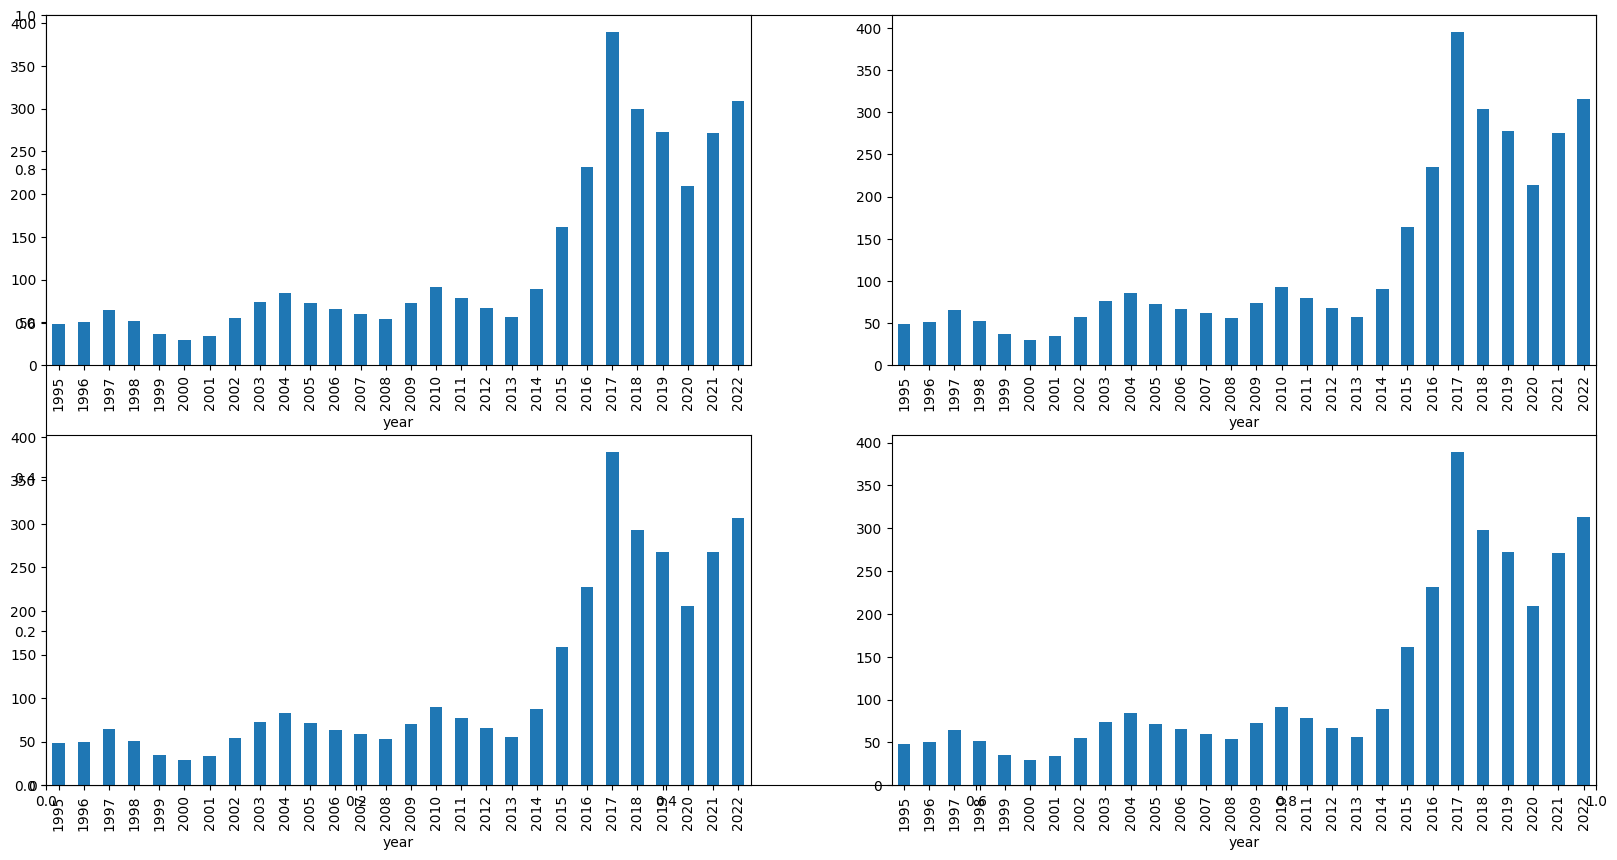

In [48]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean(numeric_only=True)
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
plt.show()


In [49]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Name,Open,High,Low,Close,Volume,Pct change,day,month,year,is_quarter_end
0,1995-01-02,HINDPETRO,54.81,54.81,54.07,54.07,2700,0.00,Monday,1,1995,0
1,1995-01-03,HINDPETRO,55.52,55.52,53.85,53.85,35775,-0.41,Tuesday,1,1995,0
2,1995-01-04,HINDPETRO,54.81,54.81,54.37,54.37,1350,0.97,Wednesday,1,1995,0
3,1995-01-06,HINDPETRO,54.07,54.07,53.11,53.11,34425,-2.32,Friday,1,1995,0
4,1995-01-09,HINDPETRO,51.85,51.85,51.11,51.70,3375,-2.65,Monday,1,1995,0


In [50]:
df['is_quarter_end'] = df['is_quarter_end'].astype(int)  # Convert bool to int
df.drop('Date', axis=1)  # Remove Date column
df.groupby('is_quarter_end').mean(numeric_only=True)  # Group & take mean



,Open,High,Low,Close,Volume,Pct change,month,year
is_quarter_end,,,,,,,,
0,113.837059,115.822833,111.727178,113.659505,4.611563e+06,0.076480,6.004505,2008.052027
1,114.158339,116.061675,112.060744,113.950913,4.900164e+06,0.042317,7.509969,2008.015507


In [51]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [52]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)


(6027, 3) (670, 3)


In [53]:
model1 =LogisticRegression()
model1.fit(X_train, Y_train)
print(f'{model1} : ')
y_pred=model1.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


LogisticRegression() : 
0.508955223880597
              precision    recall  f1-score   support

           0       0.52      0.84      0.64       348
           1       0.47      0.15      0.23       322

    accuracy                           0.51       670
   macro avg       0.49      0.50      0.43       670
weighted avg       0.49      0.51      0.44       670



In [54]:
model2 = XGBClassifier()
model2.fit(X_train, Y_train)
print(f'{model2} : ')
y_pred2=model2.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred2))
print(classification_report(Y_test, y_pred2))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
0.4955223880597015
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       348
           1       0.47      0.44      0.45       322

    accuracy                           0.50       670
  